In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
DATASET_LOCATION = '/content/drive/MyDrive/ai-playground/ra-text-classification-spectrogram/spectrograms/bert-isot4000'
data_dir = pathlib.Path(DATASET_LOCATION)

In [ ]:
TRAIN_FRACTION = 0.8
batch_size = 32 # default batch size of data
img_height = 224 # default height to which image is resized
img_width = 224 # default width to which image is resized
seed = 2022 # random seed for shuffling and transformations

In [ ]:
ds_train = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 1 - TRAIN_FRACTION,
  subset = "training",
  seed = seed,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 3032 files belonging to 2 classes.
Using 2426 files for training.


In [ ]:
ds_val = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 1 - TRAIN_FRACTION,
  subset = "validation",
  seed = seed,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 3032 files belonging to 2 classes.
Using 606 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = ds_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = ds_val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(2, activation='sigmoid')(x)

In [ ]:
model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
76/76 [==============================] - 15s 193ms/step - loss: 9.4317 - accuracy: 0.5808 - val_loss: 1.2032 - val_accuracy: 0.7277
Epoch 2/100
76/76 [==============================] - 14s 188ms/step - loss: 1.6048 - accuracy: 0.6546 - val_loss: 0.5175 - val_accuracy: 0.7723
Epoch 3/100
76/76 [==============================] - 14s 186ms/step - loss: 0.6553 - accuracy: 0.7230 - val_loss: 0.5138 - val_accuracy: 0.7327
Epoch 4/100
76/76 [==============================] - 14s 184ms/step - loss: 0.5542 - accuracy: 0.7378 - val_loss: 0.4565 - val_accuracy: 0.7954
Epoch 5/100
76/76 [==============================] - 14s 186ms/step - loss: 0.5385 - accuracy: 0.7514 - val_loss: 0.4291 - val_accuracy: 0.8218
Epoch 6/100
76/76 [==============================] - 14s 188ms/step - loss: 0.5153 - accuracy: 0.7535 - val_loss: 0.4308 - val_accuracy: 0.8102
Epoch 7/100
76/76 [==============================] - 14s 186ms/step - loss: 0.4944 - accuracy: 0.7572 - val_loss: 0.4769 - val_accuracy:

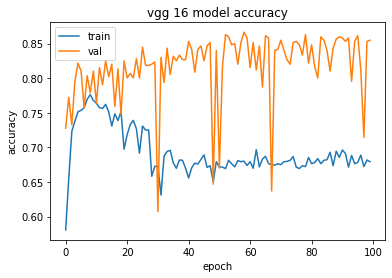

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('vgg 16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()